# **Airline Passenger Satisfaction Prediction**

### Table of Content

- [Business Understanding](#1)
- [Data Understanding](#2)
- [Data Preparation](#3)
- [Modeling](#4)
- [Evaluation](#5)
- [Deployment](#6)
- [Feedback](#7)

<a name='1'></a>
### Business Understanding

Airline customer satisfaction is important element for the success and growth of the company. Satisfied customers are more likely to become loyal, spread positive word-of-mouth, and contribute to increased revenue. Additionally, high customer satisfaction can provide a competitive advantage, result in cost savings, and improve employee morale.


![Airline Service](https://www.reuters.com/resizer/v2/https%3A%2F%2Fcloudfront-us-east-2.images.arcpublishing.com%2Freuters%2FWJBHKPN3URLDTK3UR4BNWN25CI.jpg?auth=188e1b4a8aa213a981862a4c188e7d090735a1a0ad50f4dba231170e6e1fdb9c&width=640&quality=80 "Passengers check bags at the JetBlue check in counter before their flights at Hartsfield-Jackson Atlanta International Airport (image by REUTERS)")


The business problem are:

1.    What are the main factors influencing airline customer satisfaction?
2.    Which machine learning models are best suited for predicting customer satisfaction?
3.   How accurate and reliable are the predictions made by the model?


#### Analytical Approach

With descriptive and predictive analysis, the goal of this project is to identify the key factors that influence customer satisfaction and develop a machine learning model to predict customer satisfaction levels based on these factors.

<a name='2'></a>
### Data Understanding

The dataset is sourced from the [Airline Passenger Satisfaction](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction) repository on Kaggle. It comprises responses from an airline passenger satisfaction survey.

Below is a list of columns and their descriptions:
- `Gender`: Gender of the passengers (Female, Male)
- `Customer Type`: The customer type (Loyal customer, disloyal customer)
- `Age`: The actual age of the passengers
- `Type of Travel`: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- `Class`: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- `Flight distance`: The flight distance of this journey
- `Inflight wifi service`: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
- `Departure/Arrival time convenient`: Satisfaction level of Departure/Arrival time convenient
- `Ease of Online booking`: Satisfaction level of online booking
- `Gate location`: Satisfaction level of Gate location
- `Food and drink`: Satisfaction level of Food and drink
- `Online boarding`: Satisfaction level of online boarding
- `Seat comfort`: Satisfaction level of Seat comfort
- `Inflight entertainment`: Satisfaction level of inflight entertainment
- `On-board service`: Satisfaction level of On-board service
- `Leg room service`: Satisfaction level of Leg room service
- `Baggage handling`: Satisfaction level of baggage handling
- `Check-in service`: Satisfaction level of Check-in service
- `Inflight service`: Satisfaction level of inflight service
- `Cleanliness`: Satisfaction level of Cleanliness
- `Departure Delay in Minutes`: Minutes delayed when departure
- `Arrival Delay in Minutes`: Minutes delayed when Arrival
- `Satisfaction`: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

#### Load Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Extract dataset from zip format
from zipfile import ZipFile
dataset = "Airline Passenger Satisfaction.zip"

with ZipFile(dataset, 'r') as zip:
  zip.printdir()
  print('Extract all files...')
  zip.extractall()
  print('Done')

File Name                                             Modified             Size
test.csv                                       2020-02-20 16:51:22      3037688
train.csv                                      2020-02-20 16:51:22     12193089
Extract all files...
Done


In [3]:
# Load dataset
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

# Create dataset type
test_data['type'] = 'test'
train_data['type'] = 'train'

# Combine 2 files into one dataset
data = pd.concat([test_data, train_data])
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,type
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,2,5,5,50,44.0,satisfied,test
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,3,4,5,0,0.0,satisfied,test
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,4,1,3,2,2,2,0,0.0,neutral or dissatisfied,test
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,3,1,4,0,6.0,satisfied,test
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,4,2,4,0,20.0,satisfied,test


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 103903
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      129880 no

In [5]:
# Drop unnecessary column (first column)
del data[data.columns[0]]

In [6]:
# Check the missing value
data.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
type            

The missing value only Arrival Delay in Minutes column with 393 rows. Handling missing value will be apllied at data preparation.

In [7]:
# Check duplicate data by 'id'
data[data.duplicated(['id'])].sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             0.0
satisfaction                           0
type            

#### Exploratory Data Analysis

In [8]:
data.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


There are a lot of 0 value at some columns represent "not applicable" which marked customer didn't fill the ordinal question type. It still usefull for exploratory data analysis, but need more approach for machine learning model.

In [9]:
data.describe(include='O')

,Gender,Customer Type,Type of Travel,Class,satisfaction,type
count,129880,129880,129880,129880,129880,129880
unique,2,2,2,3,2,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,train
freq,65899,106100,89693,62160,73452,103904


All columns with object datatype have 2 unique values except 'class'.

In [10]:
# Check the 'satisfication' column distribution
data['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    73452
satisfied                  56428
Name: count, dtype: int64

In [11]:
print(data['satisfaction'].value_counts(normalize=True)*100)

satisfaction
neutral or dissatisfied    56.553742
satisfied                  43.446258
Name: proportion, dtype: float64


These proportions indicate that the neutral or dissatisfied class is larger, but it’s not an extreme imbalance.

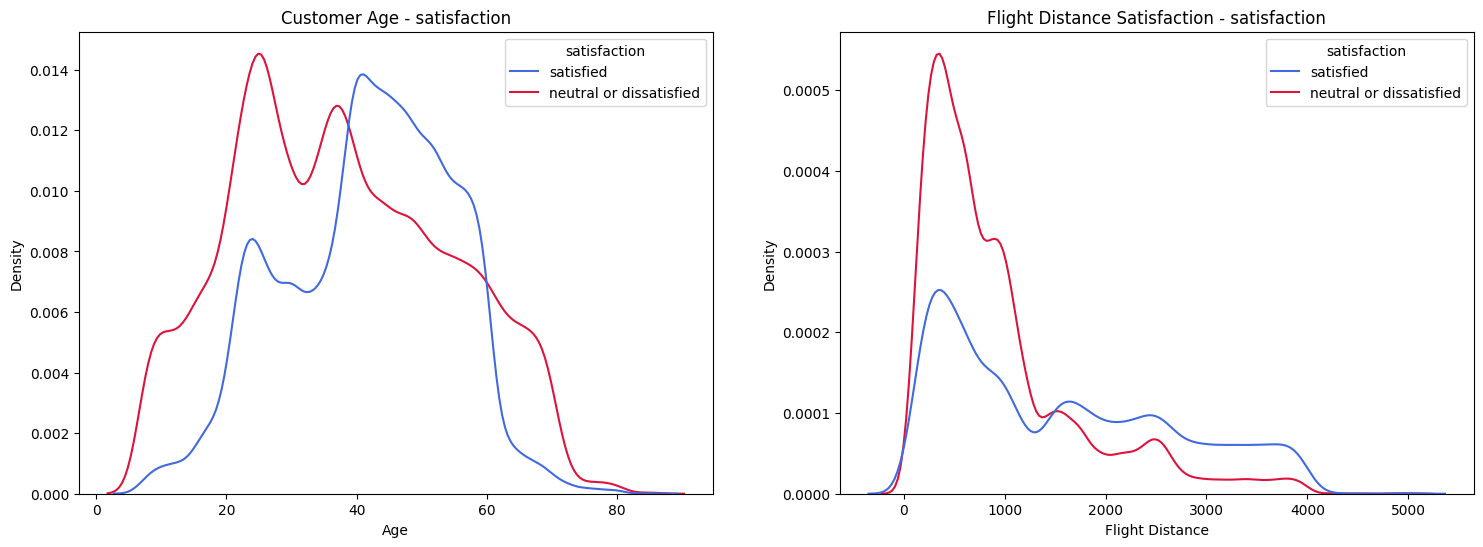

In [12]:
# Create distribution plot for 'Age' and 'Flight Distance'
fig, axes = plt.subplots(ncols=2, figsize = (18, 6))
palette = {'neutral or dissatisfied': 'crimson', 'satisfied': 'royalblue'}
sns.kdeplot(data=data, x="Age", hue='satisfaction', palette=palette, ax=axes[0]).set_title('Customer Age - satisfaction')
sns.kdeplot(data=data, x="Flight Distance", hue='satisfaction', palette=palette, ax=axes[1]).set_title('Flight Distance Satisfaction - satisfaction')
#plt.savefig('kdeplot_age_flightdistance.png')
plt.show()

Customers in the 40 and 60 likely feel satisfied meanwhile outside from them feel natural or dissastified. The flight distance below around 1500 resulted a lot of customer with feel neutral or dissastisfied.

In [13]:
# Create countplot for categorical variable
def countplot_2cols(x1, x2):
  fig, axes = plt.subplots(1, 2, figsize = (12, 6))
  palette = {'neutral or dissatisfied':'royalblue', 'satisfied':'crimson'}
  x_labels = [x1, x2]

  for i, x in enumerate(x_labels):
    p = sns.countplot(x=x, hue='satisfaction', data=data, palette=palette, ax=axes[i])
    legend = p.get_legend()
    legend.get_texts()[0].set_text('neutral or dissatisfied')
    legend.get_texts()[1].set_text('satisfied')
    xlabel = p.get_xaxis().get_label().get_text()
    p.set_title(f'Satisfaction Distribution by {xlabel}')

  plt.tight_layout()
  plt.show()

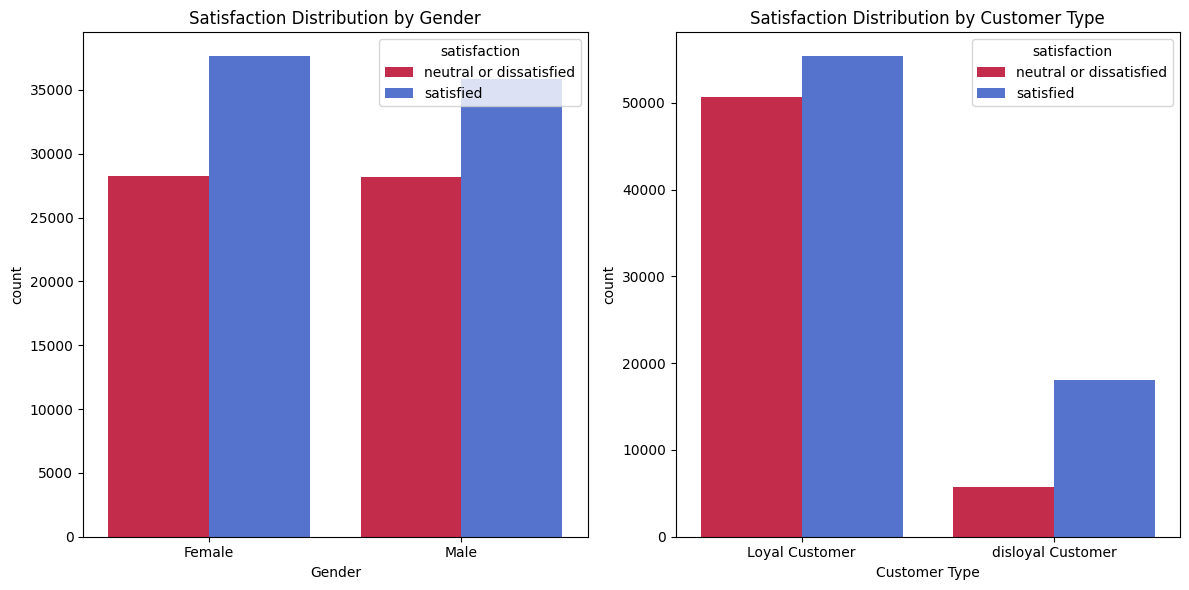

In [14]:
countplot_2cols('Gender', 'Customer Type')

Both genders feel quite satisfied. The difference between the number of customers who are satisfied and neutral or dissatisfied with disloyal customers is greater than that of loyal customers.

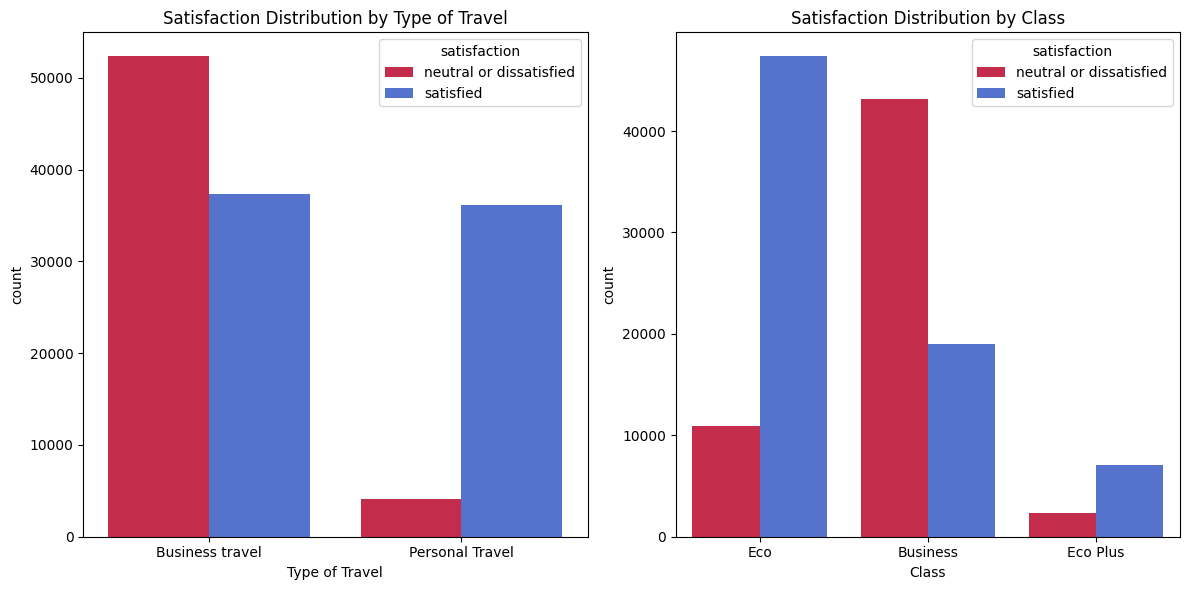

In [15]:
countplot_2cols('Type of Travel', 'Class')

Customers who choose **personal travel** are more satisfied than those who choose **business travel**. **Eco** and **eco plus** class customers are more satisfied than those who take **business class**.

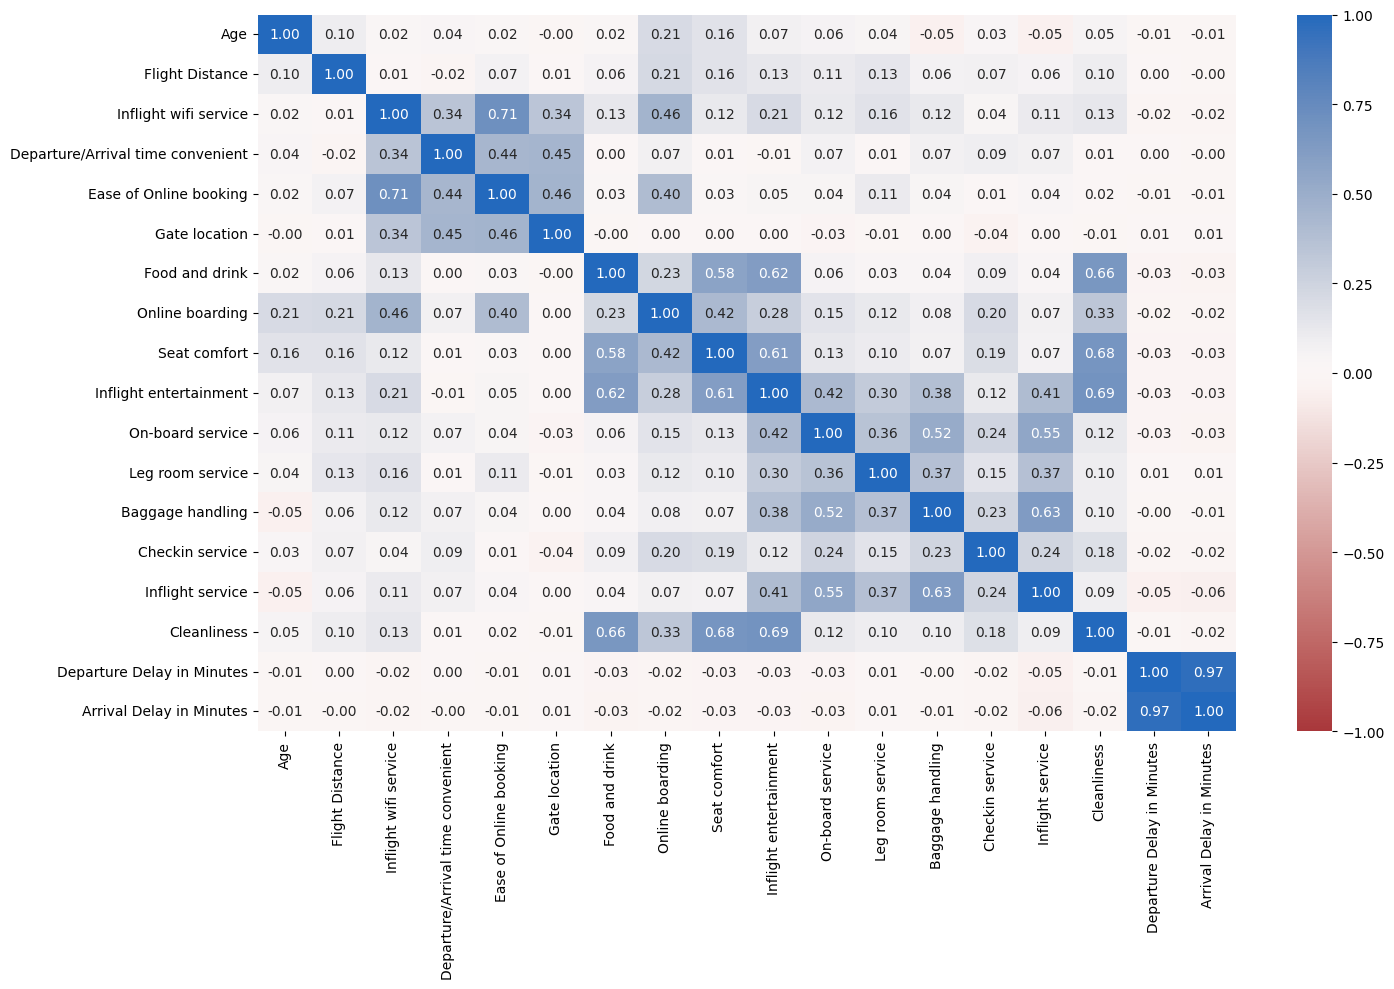

In [16]:
# Create correlation heatmap
corr = data.drop('id', axis=1).corr(numeric_only=True)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, xticklabels=True, yticklabels=True, vmin=-1, vmax=1, cmap='vlag_r', annot=True, fmt='.2f')
plt.tight_layout()
plt.show()

The heatmap shows that all variables have an average positive correlation.

**Inflight entertainment**, **seat comfort**, **online boarding** and **cleanliness** have quite high positive correlation values ​​and are large in number compared to other variables.

In [17]:
# Create countplot function for categorical variable
def countplot_cont(x1, x2, x3, x4):
    fig, axes = plt.subplots(2, 2, figsize=(16, 9))
    palette = {'neutral or dissatisfied': 'crimson', 'satisfied': 'royalblue'}
    x_labels = [x1, x2, x3, x4]

    for i, x in enumerate(x_labels):
        row = i // 2
        col = i % 2
        p = sns.countplot(x=x, hue='satisfaction', data=data, palette=palette, ax=axes[row, col])
        legend = p.get_legend()
        legend.get_texts()[0].set_text('neutral or dissatisfied')
        legend.get_texts()[1].set_text('satisfied')
        xlabel = p.get_xaxis().get_label().get_text()
        p.set_title(f'Satisfaction Distribution by {xlabel}')

    plt.tight_layout()
    #plt.savefig('countplot_categorical.png')
    plt.show()

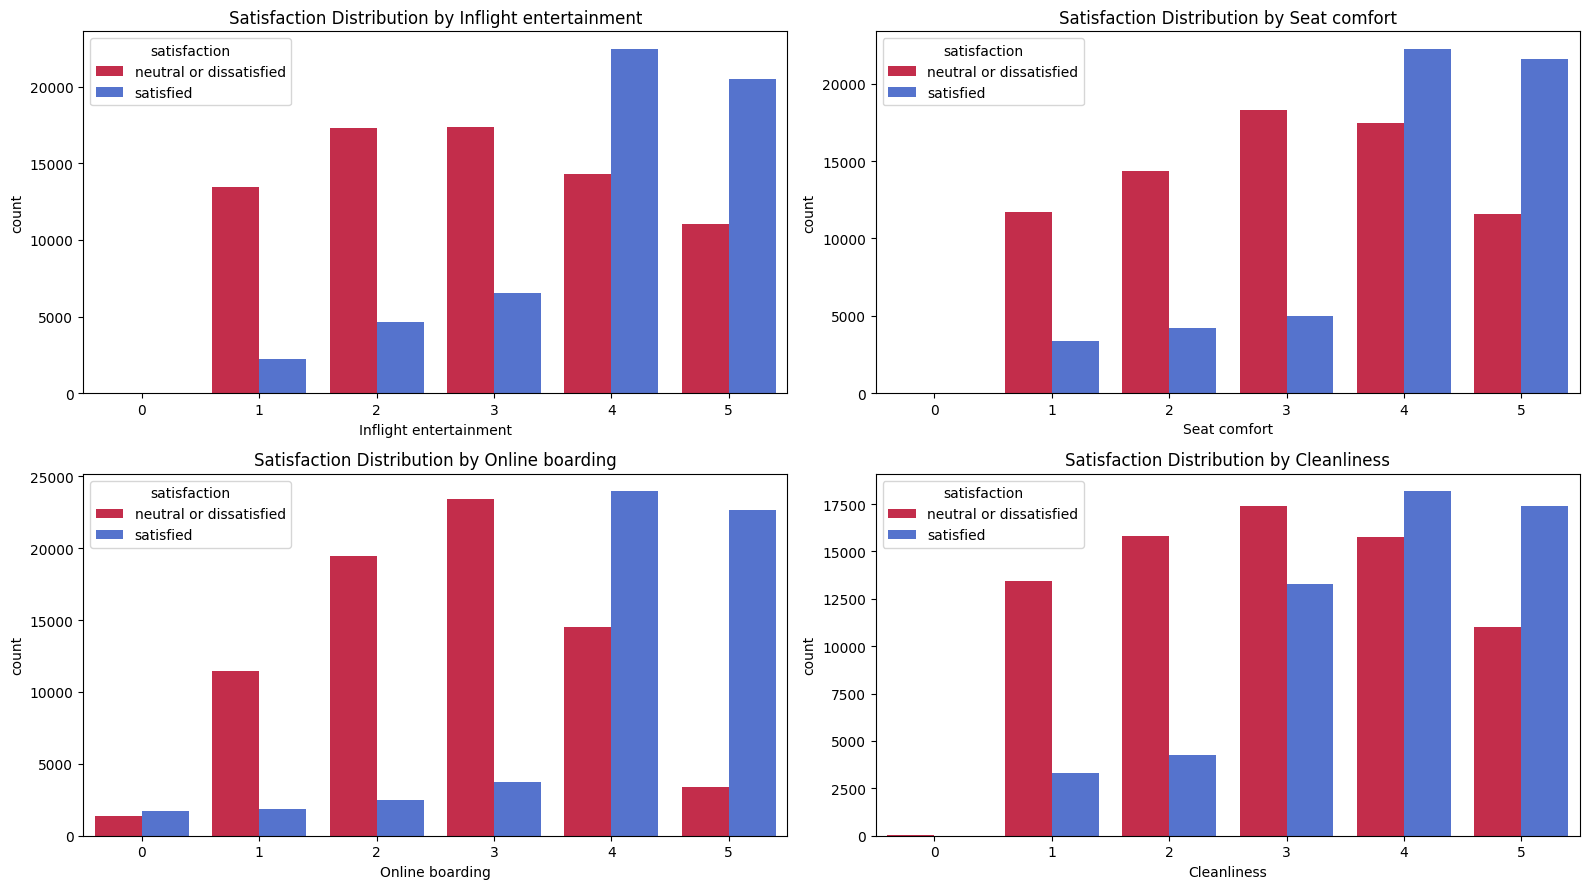

In [18]:
countplot_cont('Inflight entertainment', 'Seat comfort', 'Online boarding', 'Cleanliness')

By taking several columns as sample, customers feel satisfied with survey scores starting from **4**.

<a name='3'></a>
# Data Preparation

##### Columns Name Formatting

In [19]:
# Change the column name in lowercase format
data.columns = data.columns.str.lower()

# Replace unnecessary character with underscore ('_')
data.columns = data.columns.str.replace('[/-]', '_', regex=True)

# Replace space (' ') character with underscore ('_')
data.columns = data.columns.str.replace(' ', '_')

##### Handling Missing Value

In [20]:
# Count the missing value percentage
missing_value_pct = round(len(data[data['arrival_delay_in_minutes'].isnull()])/len(data), 5)
print('Missing value percentage: ', missing_value_pct*100)

Missing value percentage:  0.303


With very low correlation values ​​with other variables and percentages, rows with missing values ​​will be deleted.

In [21]:
# Delete the missing value
data.dropna(axis=0, inplace=True)

##### Handling Zero Value in Survey Columns

In [22]:
# Handling zero value in survey form result column
survey_cols = ['inflight_wifi_service', 'departure_arrival_time_convenient',
               'ease_of_online_booking','gate_location', 'food_and_drink',
               'online_boarding', 'seat_comfort','inflight_entertainment',
               'on_board_service', 'leg_room_service','baggage_handling',
               'checkin_service', 'inflight_service','cleanliness']

In [23]:
# Create random countplot for categorical variable
import random

def countplot_sample(random_sample):
    fig, axes = plt.subplots(2, 2, figsize=(16, 9))
    x_labels = random_sample

    for i, x in enumerate(x_labels):
        row = i // 2
        col = i % 2
        p = sns.countplot(x=x, data=data, ax=axes[row, col])
        xlabel = p.get_xaxis().get_label().get_text()
        p.set_title(f'{xlabel} distribution')

    plt.tight_layout()
    #plt.savefig('countplot_random.png')
    plt.show()

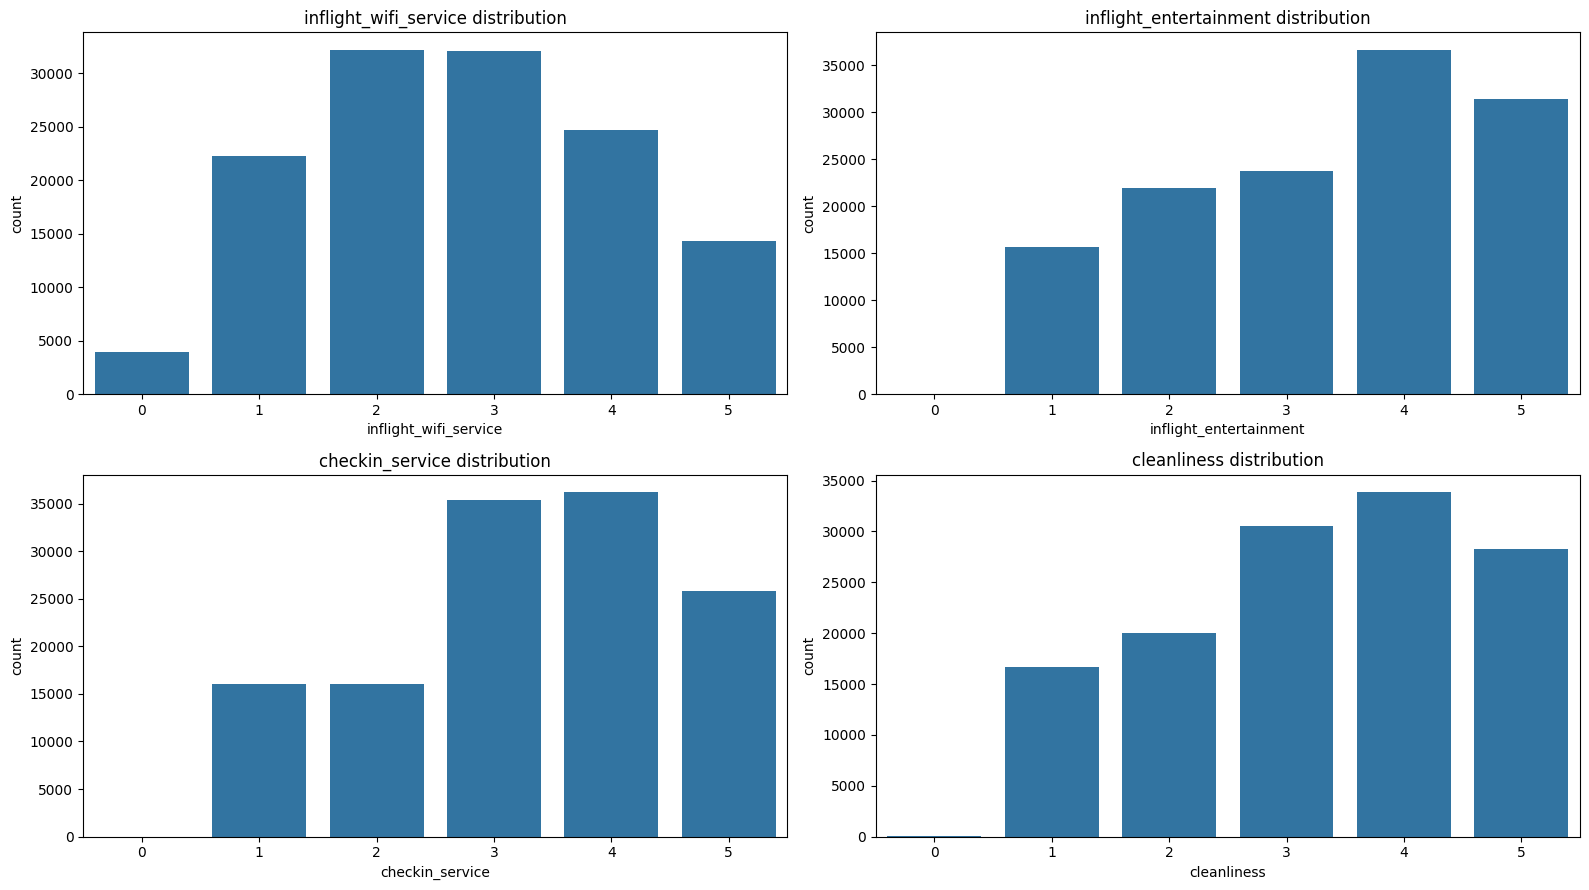

In [24]:
random_sample = random.sample(survey_cols, 4)
countplot_sample(random_sample)

By taking several samples, the column survey chart shows a tendency to skew left compared to the zero skew (normal distribution). The zero value will be replaced with the mode of that column.

In [25]:
# Replace zero value in survey columns with its column mode
for col in survey_cols:
  mode_value = data[col].mode()[0]
  data[col].replace(0, mode_value, inplace=True)

In [26]:
data[survey_cols].describe()

,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,2.788905,3.263208,2.888058,2.976932,3.208700,3.347587,3.441620,3.358623,3.383359,3.369489,3.631886,3.306270,3.642528,3.286654
std,1.246814,1.361385,1.271794,1.278479,1.326256,1.256015,1.319134,1.333583,1.286866,1.296963,1.180082,1.266114,1.176398,1.313200
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


The min value proved that zero value has been replaced with other value.

##### Data Transformation

In [27]:
# Create class label
# class_label = 0 if satifaction = neutral or dissatisfied
# class_label = 1 if satisfaction = satisfied
data['label'] = data['satisfaction'].apply(lambda x:1 if x == 'satisfied' else 0)

In [28]:
# One-hot encode the specified categorical columns
encoded_cols = ['gender', 'customer_type', 'type_of_travel', 'class']
data_encoded = pd.get_dummies(data[encoded_cols], columns=encoded_cols)
data_encoded = data_encoded.astype(int)

In [29]:
data_encoded.head()

,gender_Female,gender_Male,customer_type_Loyal Customer,customer_type_disloyal Customer,type_of_travel_Business travel,type_of_travel_Personal Travel,class_Business,class_Eco,class_Eco Plus
0,1,0,1,0,1,0,0,1,0
1,1,0,1,0,1,0,1,0,0
2,0,1,0,1,1,0,0,1,0
3,0,1,1,0,1,0,1,0,0
4,1,0,1,0,1,0,0,1,0


In [30]:
# Append hot encoded dataframe to main data
df = pd.concat([data, data_encoded], axis=1)

In [31]:
df.columns

Index(['id', 'gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on_board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction', 'type', 'label', 'gender_Female', 'gender_Male',
       'customer_type_Loyal Customer', 'customer_type_disloyal Customer',
       'type_of_travel_Business travel', 'type_of_travel_Personal Travel',
       'class_Business', 'class_Eco', 'class_Eco Plus'],
      dtype='object')

In [32]:
# Drop unnecesaary columns
dropped_cols = ['id', 'gender', 'customer_type', 'type_of_travel', 'class', 'satisfaction']
df = df.drop(dropped_cols, axis=1)

In [33]:
# Copy the clean df
df2 = df.copy()

##### Generate Train and Test Data

The dataset comes with 2 files in it, train and test data. Just need a back transformation to get them, rather than having to use the train_test_split feature from the sklearn library.

In [34]:
# Create train dataset
X_train = y_train = df[df['type'] == 'train']
X_train = X_train.drop(['type', 'label'], axis=1)
y_train = y_train['label']

# Create test dataset
X_test = y_test = df[df['type'] == 'test']
X_test = X_test.drop(['type', 'label'], axis=1)
y_test = y_test['label']

In [35]:
# Create a copy of X_train and X_test data
X_train2 = X_train.copy()
X_test2 = X_test.copy()

In [36]:
# Calculate the proportion of train and test data
train_pct = (len(X_train)/len(df))*100
test_pct = (len(X_test)/len(df))*100
print(f'Train data percentage: {train_pct:.2f}%')
print(f'Test data percentage: {test_pct:.2f}%')

Train data percentage: 80.00%
Test data percentage: 20.00%


 The dataset has been split into 80% training data and 20% testing data.

In [37]:
# Examine the number of label
y_test.value_counts()

label
0    14528
1    11365
Name: count, dtype: int64

In [38]:
# Standardize the train and test data
from sklearn import preprocessing
transform = preprocessing.StandardScaler()
X_train = transform.fit_transform(X_train)
X_test = transform.fit_transform(X_test)

<a name='4'></a>
# Modeling

Machine learning will be used:
- Logistic Regression
- Decision Trees
- Random Forests
- Gradient Boosting Machines (GBM)
- Gaussian Naive Bayes (GaussianNB)

In [39]:
# Import NumPy library
import numpy as np

# Import algorithms from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# Import model performance metrics from sklearn
from sklearn.metrics import classification_report, accuracy_score, jaccard_score, f1_score

Plot the confusion matrix

In [40]:
#Create function plots the confusion matrix"
def plot_confusion_matrix(y,y_predict):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.color_palette("light:b", as_cmap=True)
    sns.heatmap(cm, annot=True, ax = ax, cmap='Blues'); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['neutral or dissatisfied', 'satisfied']);
    ax.yaxis.set_ticklabels(['neutral or dissatisfied', 'satisfied'])
    plt.show()

#### Logistic Regression

In [41]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [42]:
y_pred = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred)
logreg_jaccard_score = jaccard_score(y_test, y_pred)
logreg_f1_score = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89     14528
           1       0.87      0.85      0.86     11365

    accuracy                           0.88     25893
   macro avg       0.88      0.88      0.88     25893
weighted avg       0.88      0.88      0.88     25893



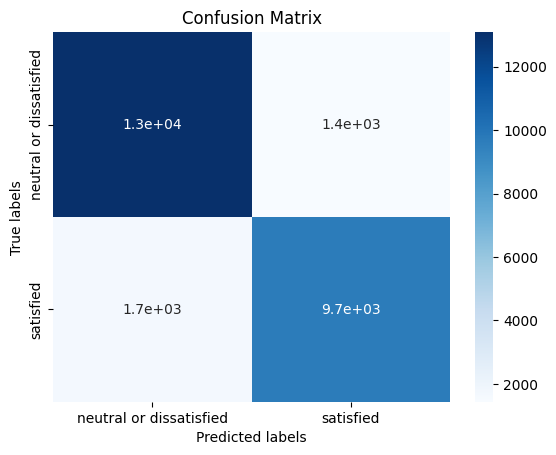

In [43]:
y_pred = logreg.predict(X_test)
plot_confusion_matrix(y_test,y_pred)

False Positive and False Negative values ​​are quite large in value and become a problem.

#### Decision Tree

In [44]:
tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
y_pred = tree.predict(X_test)
tree_accuracy = accuracy_score(y_test, y_pred)
tree_jaccard_score = jaccard_score(y_test, y_pred)
tree_f1_score = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14528
           1       0.93      0.94      0.93     11365

    accuracy                           0.94     25893
   macro avg       0.94      0.94      0.94     25893
weighted avg       0.94      0.94      0.94     25893



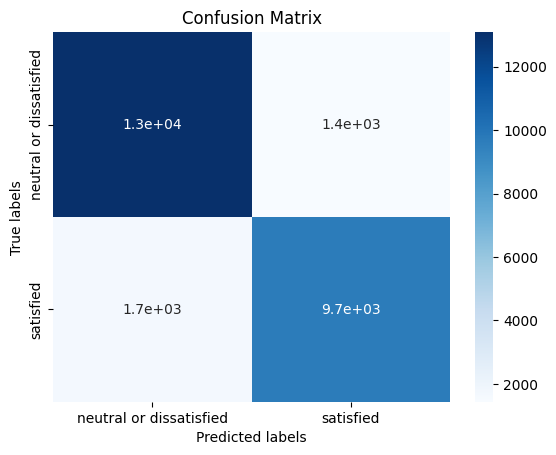

In [46]:
y_pred = logreg.predict(X_test)
plot_confusion_matrix(y_test,y_pred)

#### Random Forest

In [47]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
y_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
rf_jaccard_score = jaccard_score(y_test, y_pred)
rf_f1_score = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14528
           1       0.97      0.93      0.95     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893



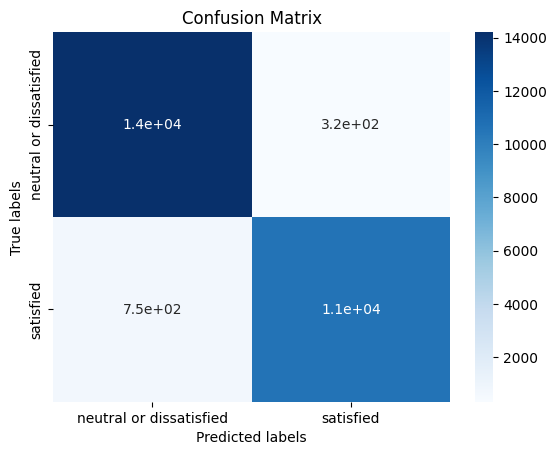

In [49]:
plot_confusion_matrix(y_test,y_pred)

Compared with previous algorithms, the False Positive and False Negative values ​​decreased significantly in the Random Forest algorithm.

#### XGBoost

In [50]:
xgb = GradientBoostingClassifier()

xgb.fit(X_train, y_train)

GradientBoostingClassifier()

In [51]:
y_pred = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_jaccard_score = jaccard_score(y_test, y_pred)
xgb_f1_score = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     14528
           1       0.94      0.91      0.93     11365

    accuracy                           0.94     25893
   macro avg       0.94      0.93      0.93     25893
weighted avg       0.94      0.94      0.94     25893



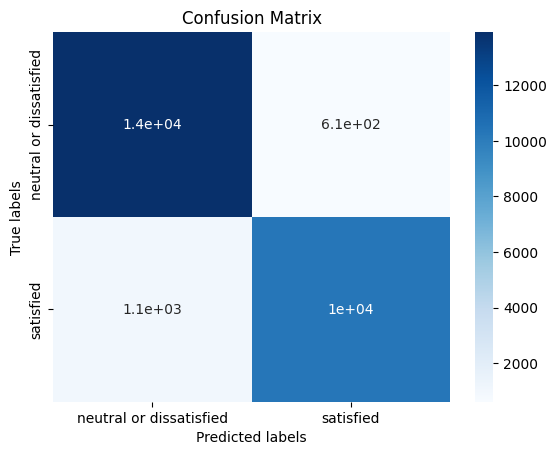

In [52]:
plot_confusion_matrix(y_test,y_pred)

### GaussianNB

In [53]:
gnb = GaussianNB()

gnb.fit(X_train, y_train);

In [54]:
y_pred = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, y_pred)
gnb_jaccard_score = jaccard_score(y_test, y_pred)
gnb_f1_score = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     14528
           1       0.84      0.81      0.82     11365

    accuracy                           0.85     25893
   macro avg       0.85      0.84      0.85     25893
weighted avg       0.85      0.85      0.85     25893



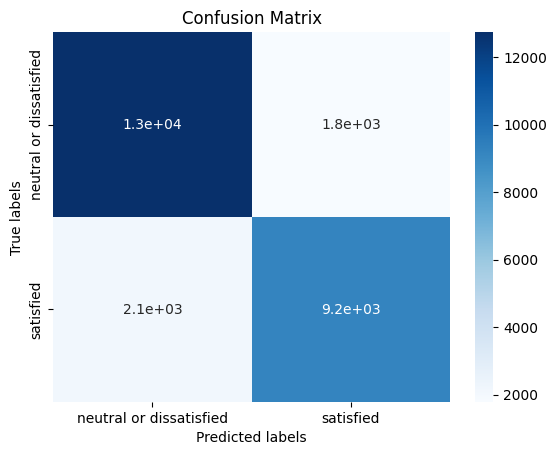

In [55]:
plot_confusion_matrix(y_test,y_pred)

In [56]:
# Show models performance in tabular format
Report = pd.DataFrame({'Models': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'GaussianNB']})
Report['Accuracy'] = [logreg_accuracy, tree_accuracy, rf_accuracy, xgb_accuracy, gnb_accuracy]
Report['Jaccard Score'] = [logreg_jaccard_score, tree_jaccard_score, rf_jaccard_score, xgb_jaccard_score, gnb_jaccard_score]
Report['F1 Score'] = [logreg_f1_score, tree_f1_score, rf_f1_score, xgb_f1_score, gnb_f1_score]
Report

,Models,Accuracy,Jaccard Score,F1 Score
0,Logistic Regression,0.879427,0.756113,0.861121
1,Decision Tree,0.941142,0.874640,0.933129
2,Random Forest,0.958560,0.908196,0.951890
3,XGBoost,0.935542,0.860638,0.925100
4,GaussianNB,0.848608,0.701946,0.824875


<ipython-input-57-93f3346256ce>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Report, x='Models', y='Accuracy', palette='bright')


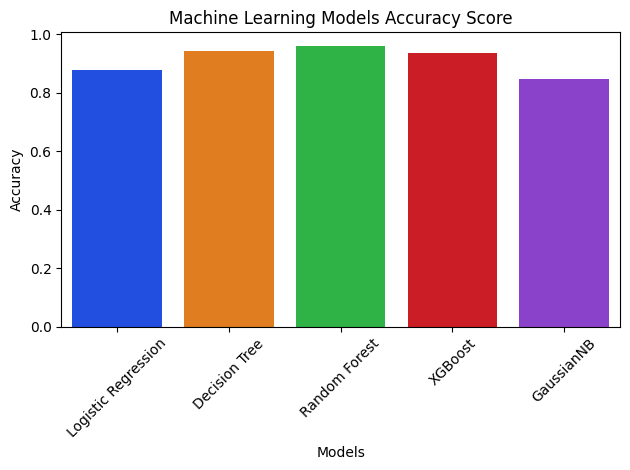

In [57]:
import seaborn as sns

sns.barplot(data=Report, x='Models', y='Accuracy', palette='bright')
plt.title('Machine Learning Models Accuracy Score')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('models_accuracy.png')
plt.show()

The high accuracy scores of Decision Tree, Random Forest, and XGBoost suggest that these models have a good fit to the dataset. Random Forest's ensemble technique most likely contributes to its high accuracy by reducing overfitting and variation.

Random Forest has the highest accuracy score at 0.9586. This indicates that it is the best-performing model in terms of correctly classifying the instances.

<a name='5'></a>
# Evaluation

#### Cross-validation

In [58]:
# Import StratifiedKFold from Sklearn
from sklearn.model_selection import StratifiedKFold

# Convert y_train as NumPy arrays
y_train = np.array(y_train)

# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=10).split(X_train, y_train)
results = []

# Perform Stratified K-Fold Cross Validation
for i, (train_index, test_index) in enumerate(skf):
    # Split data into training and test sets for this fold
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    # Fit the classifier on the training data of this fold
    rf.fit(X_train_fold, y_train_fold)

    # Evaluate the classifier on the test data of this fold
    accuracy = rf.score(X_test_fold, y_test_fold)
    results.append(accuracy)

    print(f'k-fold: {i+1}, Class Ratio: {np.bincount(y_train_fold)}, Accuracy: {accuracy:.4f}')

# Print the average accuracy across all folds
print(f'Average Accuracy: {np.mean(results):.4f}')

k-fold: 1, Class Ratio: [52827 40407], Accuracy: 0.9576
k-fold: 2, Class Ratio: [52827 40407], Accuracy: 0.9562
k-fold: 3, Class Ratio: [52827 40407], Accuracy: 0.9584
k-fold: 4, Class Ratio: [52827 40407], Accuracy: 0.9592
k-fold: 5, Class Ratio: [52827 40408], Accuracy: 0.9574
k-fold: 6, Class Ratio: [52827 40408], Accuracy: 0.9574
k-fold: 7, Class Ratio: [52827 40408], Accuracy: 0.9595
k-fold: 8, Class Ratio: [52828 40407], Accuracy: 0.9583
k-fold: 9, Class Ratio: [52828 40407], Accuracy: 0.9602
k-fold: 10, Class Ratio: [52828 40407], Accuracy: 0.9618
Average Accuracy: 0.9586


Cross-validation results show that the model is highly accurate, stable, and generalizable across different variations of the training data.

#### Features Selection by Feature Importance

In [59]:
# Call the random forest feature importance attribute
importances = rf.feature_importances_

features = df.drop(['label'], axis=1).columns
indices = np.argsort(importances)[::-1]

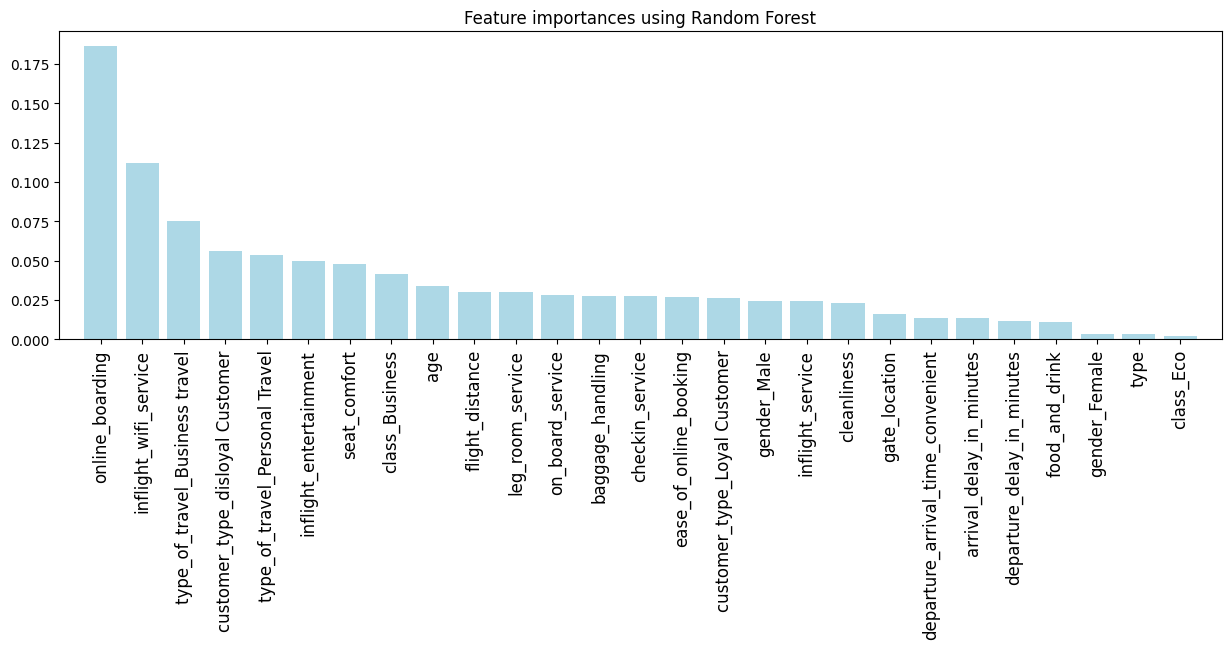

In [60]:
plt.figure(figsize=(15,4))
plt.title("Feature importances using Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], color="lightblue", align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation='vertical',fontsize=12)
plt.xlim([-1, X_train.shape[1]])
#plt.savefig('feature_selection.png')
plt.show()

In [61]:
features_df = pd.DataFrame({'features': features})
importances_df = pd.DataFrame({"importances":importances})

features_importances = pd.concat([features_df, importances_df], axis=1)
features_importances = features_importances.sort_values(by='importances', ascending=False).reset_index()

In [62]:
features_importances.head(15)

,index,features,importances
0,7,online_boarding,0.186346
1,2,inflight_wifi_service,0.111929
2,23,type_of_travel_Business travel,0.074973
3,22,customer_type_disloyal Customer,0.056039
4,24,type_of_travel_Personal Travel,0.053758
5,9,inflight_entertainment,0.049935
6,8,seat_comfort,0.047610
7,25,class_Business,0.041757
8,0,age,0.033846
9,1,flight_distance,0.030229


In [63]:
# Select features with importance scores higher than the mean importance score
selected_columns = features_importances[features_importances['importances'] > features_importances['importances'].mean()]['features'].to_list()
selected_columns

['online_boarding',
 'inflight_wifi_service',
 'type_of_travel_Business travel',
 'customer_type_disloyal Customer',
 'type_of_travel_Personal Travel',
 'inflight_entertainment',
 'seat_comfort',
 'class_Business']

#### Features Selection with RFE

In [64]:
# Import RFE from sklearn
from sklearn.feature_selection import RFE

# Create RFE instance
rfe = RFE(estimator=rf, n_features_to_select=27)

# Fit the RFE to train data
rfe.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(), n_features_to_select=27)

In [65]:
# Create temporary data for RFE
temp_data = df.drop(['type', 'label'], axis=1)

# Fit the RFE model
rfe.fit(X_train, y_train)

# If X_train is not a DataFrame, create a DataFrame with appropriate column names
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=temp_data.columns)

# Print selected features and their ranks
for featureNum in range(X_train.shape[1]):
    if rfe.support_[featureNum]:
        print(f"Feature: {X_train.columns[featureNum]}, Rank: {rfe.ranking_[featureNum]}")

Feature: age, Rank: 1
Feature: flight_distance, Rank: 1
Feature: inflight_wifi_service, Rank: 1
Feature: departure_arrival_time_convenient, Rank: 1
Feature: ease_of_online_booking, Rank: 1
Feature: gate_location, Rank: 1
Feature: food_and_drink, Rank: 1
Feature: online_boarding, Rank: 1
Feature: seat_comfort, Rank: 1
Feature: inflight_entertainment, Rank: 1
Feature: on_board_service, Rank: 1
Feature: leg_room_service, Rank: 1
Feature: baggage_handling, Rank: 1
Feature: checkin_service, Rank: 1
Feature: inflight_service, Rank: 1
Feature: cleanliness, Rank: 1
Feature: departure_delay_in_minutes, Rank: 1
Feature: arrival_delay_in_minutes, Rank: 1
Feature: gender_Female, Rank: 1
Feature: gender_Male, Rank: 1
Feature: customer_type_Loyal Customer, Rank: 1
Feature: customer_type_disloyal Customer, Rank: 1
Feature: type_of_travel_Business travel, Rank: 1
Feature: type_of_travel_Personal Travel, Rank: 1
Feature: class_Business, Rank: 1
Feature: class_Eco, Rank: 1
Feature: class_Eco Plus, Rank:

The RFE results showing equal importance for all features suggest that each feature contributes significantly to the model's predictions.

#### Accuracy Tests

In [66]:
# Create train & test data for selected columns
X_train2 = X_train2[selected_columns]
X_test2 = X_test2[selected_columns]

In [67]:
# Standardize the train and test data
transform = preprocessing.StandardScaler()
X_train2 = transform.fit_transform(X_train2)
X_test2 = transform.fit_transform(X_test2)

In [68]:
rf.fit(X_train2, y_train)

RandomForestClassifier()

In [69]:
y_pred2 = rf.predict(X_test2)
rf_accuracy_2 = accuracy_score(y_test, y_pred2)
rf_jaccard_score_2 = jaccard_score(y_test, y_pred2)
rf_f1_score_2 = f1_score(y_test, y_pred2)
report = classification_report(y_test, y_pred2)

print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     14528
           1       0.94      0.91      0.92     11365

    accuracy                           0.93     25893
   macro avg       0.93      0.93      0.93     25893
weighted avg       0.93      0.93      0.93     25893



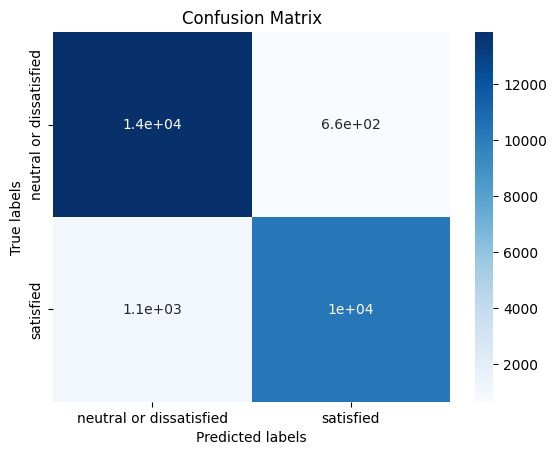

In [70]:
plot_confusion_matrix(y_test,y_pred2)

In [71]:
print('Test data accuracy of random forest (default): ', rf_accuracy)
print('Test data accuracy of random forest (selected features): ', accuracy_score(y_test, y_pred2))

Test data accuracy of random forest (default):  0.9585602286332213
Test data accuracy of random forest (selected features):  0.9333796779052254


When the selected features are used instead of all features, the accuracy decreases significantly.

#### Receiver Operating Characteristic (ROC) Curve

In [72]:
# Import roc_curve and auc
from sklearn.metrics import roc_curve, auc

In [73]:
# Create a dictionary of all models
models = [{'label': 'Logistic Regression', 'model': logreg},
          {'label': 'Decision Tree', 'model': tree},
          {'label': 'Random Forest', 'model': rf},
          {'label': 'XGBoost', 'model':xgb},
          {'label': 'GaussianNB', 'model':gnb}]

# Calculate the FPR, TPR and threshold of random forest (selected features)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred2, pos_label=1)
roc_auc2 = auc(fpr2, tpr2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


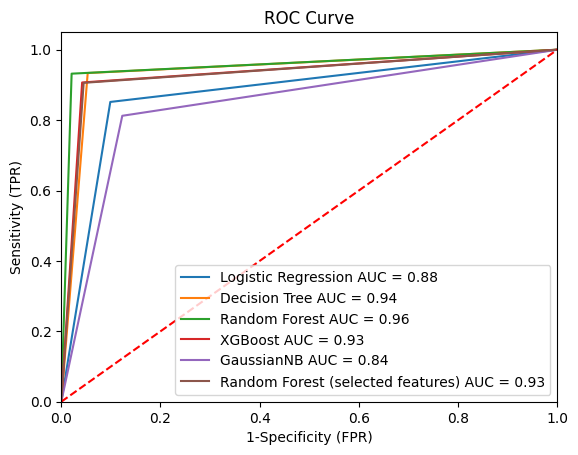

In [75]:
# Plot the ROC curve
for m in models:
  model = m['model']
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, label='%s AUC = %0.2f' % (m['label'], roc_auc))

plt.plot(fpr2, tpr2, label='%s AUC = %0.2f' % ('Random Forest (selected features)', roc_auc2))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('roc_curve.png')
plt.show()

Compared with all models, Random Forest has the highest accuracy and AUC scores. We have decided to use the Random Forest model with default parameters to predict customer airline satisfaction.

<a name='6'></a>
# Deployment

Save the model to deploy it for use in live applications or other platforms that support real-time decision-making.

In [ ]:
# Save the model with joblib library
import joblib
filename = 'airline_satisfaction_model.sav'
#joblib.dump(rf, filename)

<a name='7'></a>
# Feedback

Feedback for refining and improving the model and entire process is::

- **Model performance evaluation**:
  - Selecting alternative modeling algorithms.
  - Precision and recall measures should be evaluated to ensure that performance is balanced across all classes.
  - Using GridSearchCV for finding the model's best parameters.

- **Data evaluation**:
  - To improve model performance in large datasets, consider implementing further data cleaning and preprocessing techniques.

- **Stakeholder Feedback**:
  - Collecting feedback from end-users and stakeholders on the model's usability and effectiveness will provide valuable insights for future iterations.